# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/ealaxi/paysim1

2. **Isi Dataset**:

* Transaksi yang disimulasikan: sekitar 24 juta transaksi (versi untuk Kaggle adalah 1/4 dari ukuran aslinya).
* Terdiri dari 5 tipe transaksi:

    * CASH-IN
    * CASH-OUT
    * DEBIT
    * PAYMENT
    * TRANSFER

* Simulasi berjalan selama 744 step (1 step = 1 jam, total 30 hari).

3. **Fitur Dataset**:

* step: waktu (jam ke-berapa).
* type: jenis transaksi.
* amount: jumlah transaksi.
* nameOrig: ID akun pengirim.
* oldbalanceOrg, newbalanceOrig: saldo sebelum & sesudah transaksi (pengirim).
* nameDest: ID akun penerima.
* oldbalanceDest, newbalanceDest: saldo sebelum & sesudah transaksi (penerima).
* isFraud: transaksi fraud hasil simulasi (contoh: akun dikompromi lalu transfer → cash out).
* isFlaggedFraud: transaksi yang ditandai sistem bisnis (contoh: transfer > 200.000 sekali kirim).



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os, shutil
from google.colab import files
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bustanulkhair","key":"59214902db599e3f755fb1e9cf36c965"}'}

In [3]:
# Buat direktori jika belum ada

os.makedirs("/root/.kaggle", exist_ok=True)

# Pindahkan file ke direktori .kaggle

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Atur permission agar tidak terlalu terbuka

os.chmod("/root/.kaggle/kaggle.json", 600)

In [4]:
!kaggle datasets download ealaxi/paysim1
!unzip paysim1.zip

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 95% 169M/178M [00:00<00:00, 502MB/s]
100% 178M/178M [00:00<00:00, 522MB/s]
Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [5]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
df.duplicated().sum()

np.int64(0)

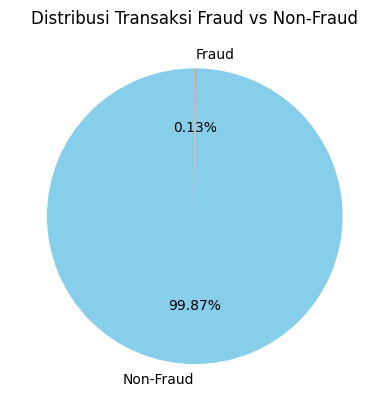

In [10]:
labels = ('Non-Fraud', 'Fraud')
data = df['isFraud'].value_counts()

plt.pie(data, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue','salmon'])
plt.title("Distribusi Transaksi Fraud vs Non-Fraud")
plt.show()


/tmp/ipython-input-1917246302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='viridis')


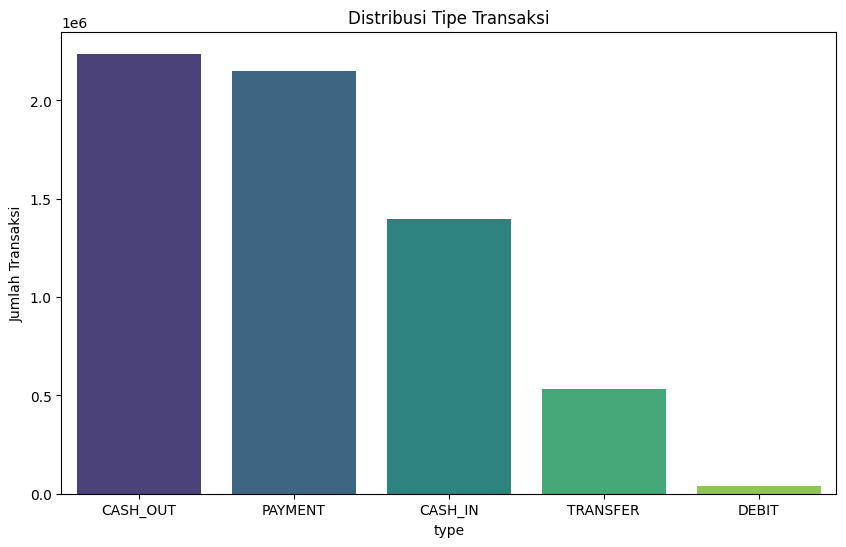

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='viridis')
plt.title("Distribusi Tipe Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.show()

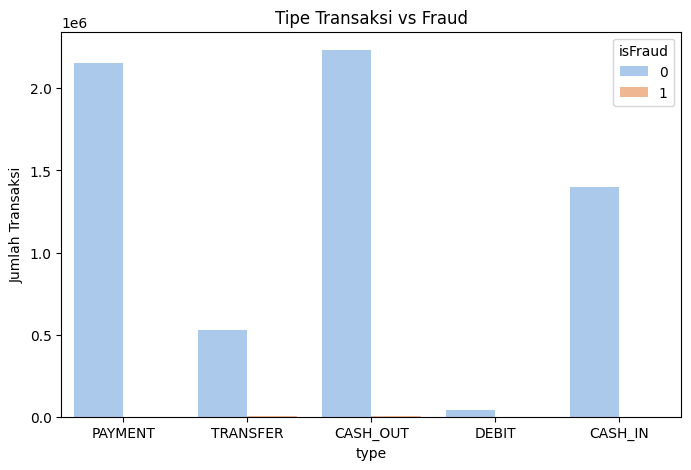

In [12]:
# Fraud hanya di jenis transaksi tertentu?
plt.figure(figsize=(8,5))
sns.countplot(x="type", hue="isFraud", data=df, palette="pastel")
plt.title("Tipe Transaksi vs Fraud")
plt.ylabel("Jumlah Transaksi")
plt.show()

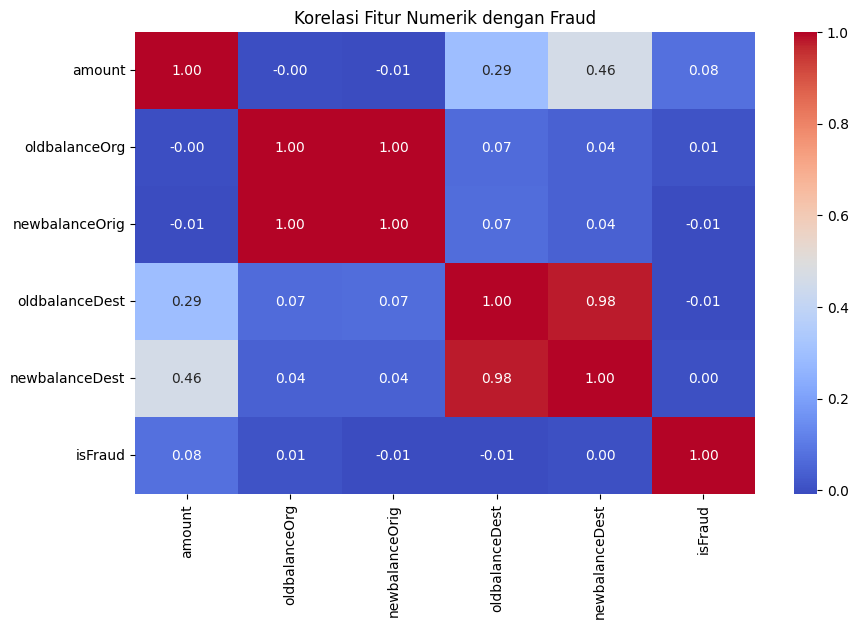

In [13]:
# Korelasi antar kolom numerik
num_feature = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_feature].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Fitur Numerik dengan Fraud")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
df = df.drop(['isFlaggedFraud'], axis=1)

In [15]:
df['sender_type'] = df['nameOrig'].str[0]   # C atau M
df['receiver_type'] = df['nameDest'].str[0]
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,sender_type,receiver_type
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,C,M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,C,M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,C,C
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,C,C
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,C,M


mengambil perumpamaan C = Customer dan M = Merchant

In [16]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['type', 'sender_type', 'receiver_type'])
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,sender_type_C,receiver_type_C,receiver_type_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False,True,False,True
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False,True,False,True
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True,True,True,False
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False,True,True,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False,True,False,True


In [17]:
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,sender_type_C,receiver_type_C,receiver_type_M,errorBalanceOrig,errorBalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False,True,False,True,0.0,9839.64
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False,True,False,True,0.0,1864.28
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True,True,True,False,0.0,181.00
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False,True,True,False,0.0,21363.00
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False,True,False,True,0.0,11668.14


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',
            'errorBalanceOrig','errorBalanceDest']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,sender_type_C,receiver_type_C,receiver_type_M,errorBalanceOrig,errorBalanceDest
0,1,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,False,False,False,True,False,True,False,True,-0.33148,-0.103566
1,1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,False,False,False,True,False,True,False,True,-0.33148,-0.121629
2,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,False,False,False,False,True,True,True,False,-0.33148,-0.125442
3,1,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,False,True,False,False,False,True,True,False,-0.33148,-0.077468
4,1,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,False,False,False,True,False,True,False,True,-0.33148,-0.099425


In [19]:
from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)
y = df['isFraud']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8896169, 16), (3812645, 16), (8896169,), (3812645,))